In [61]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from psis import psisloo
from os import path as op

In [56]:
with open(op.join("..", "wellbeing_hierarchical_gaussian.pkl"), "rb") as f:
    posterior_samples = pickle.load(f)

    
# Shape n-samples x m-parameters
mu_national = np.array(posterior_samples[0])
mu_regional = np.array(posterior_samples[1])
sigma_national = np.array(posterior_samples[2])
sigma_regional = np.array(posterior_samples[3])
log_lik = np.array(posterior_samples[4])


In [95]:
print(np.sum(np.isnan(log_lik)))
print(log_lik.shape)

print(log_lik[:1,:])

0
(2000, 3029)
[[-0.20859195 -2.32002669 -1.09161128 ...  1.0975782   1.67164325
   0.71449429]]


In [93]:
# PSISLOO
psis = psisloo(log_lik)

h_elppd = psis[0]
h_lpd = np.log(np.exp(log_lik).mean(axis=0)).sum()
h_khat = psis[2]
print(h_elppd)

# 
print(h_lpd - h_elppd)
print(h_khat)

3904.528567212985
84.32299165082986
[ 0.09062805  0.24349099  0.1703368  ... -0.03070096 -0.05938973
 -0.03226231]


Text(0.5, 1.0, 'Khat values of the Gaussian model')

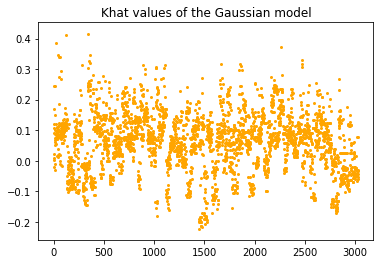

In [94]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(0,len(h_khat)), h_khat, color="Orange", s=4)
ax.set_title("Khat values of the Gaussian model")